# Clasificador de spam de SMS

Dataset: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset?resource=download

### 1. Limpieza de datos y preprocesado

In [1]:
import pandas as pd
import matplotlib.pyplot as plp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud, STOPWORDS

In [4]:
df = pd.read_csv("spam.csv", encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)

In [10]:
df = df[["v2", "v1"]]
df

,v2,v1
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [12]:
df = df.rename(columns={"v1":"label", "v2":"text"})
df

,text,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


### 2. Visualizacion de la informacion

In [15]:
from wordcloud import WordCloud, STOPWORDS

def visualize(label):
    words = ''
    for msg in df[df['label'] == label]['text']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


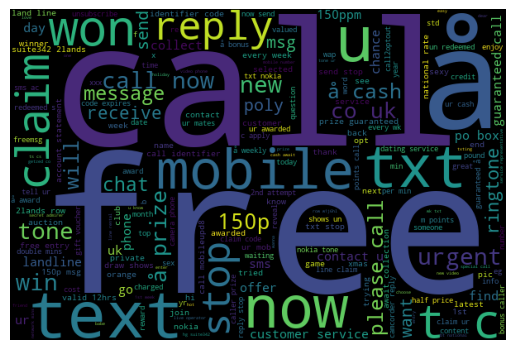

In [17]:
visualize("spam")

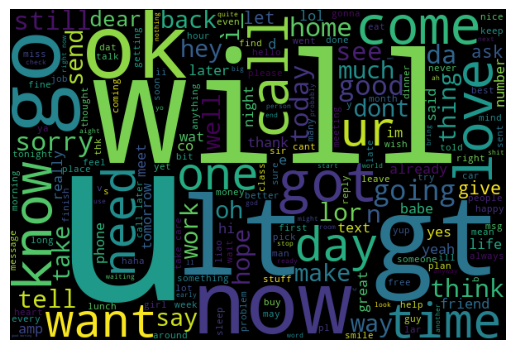

In [18]:
visualize("ham")

<Axes: >

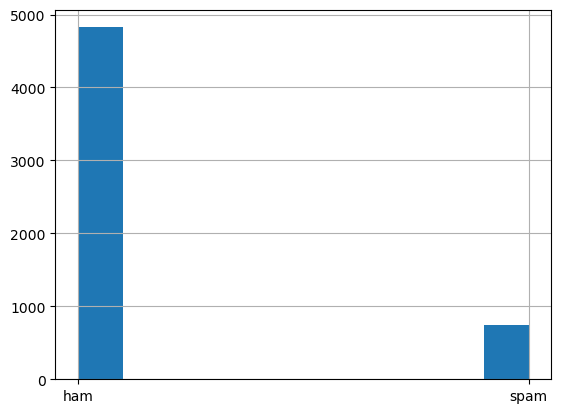

In [20]:
df['label'].hist()

### 3. Entrenamiento

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=32)

In [26]:
y_train

3092    ham
5563    ham
2549    ham
1833    ham
1432    ham
       ... 
4030    ham
2940    ham
1334    ham
1579    ham
2775    ham
Name: label, Length: 4457, dtype: object

In [28]:
vectorizer = CountVectorizer()

In [30]:
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [32]:
clf = MultinomialNB()

clf.fit(X_train_bow, y_train)

MultinomialNB()

In [34]:
y_pred = clf.predict(X_test_bow)
y_pred

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'spam'], dtype='<U4')

In [36]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9847533632286996